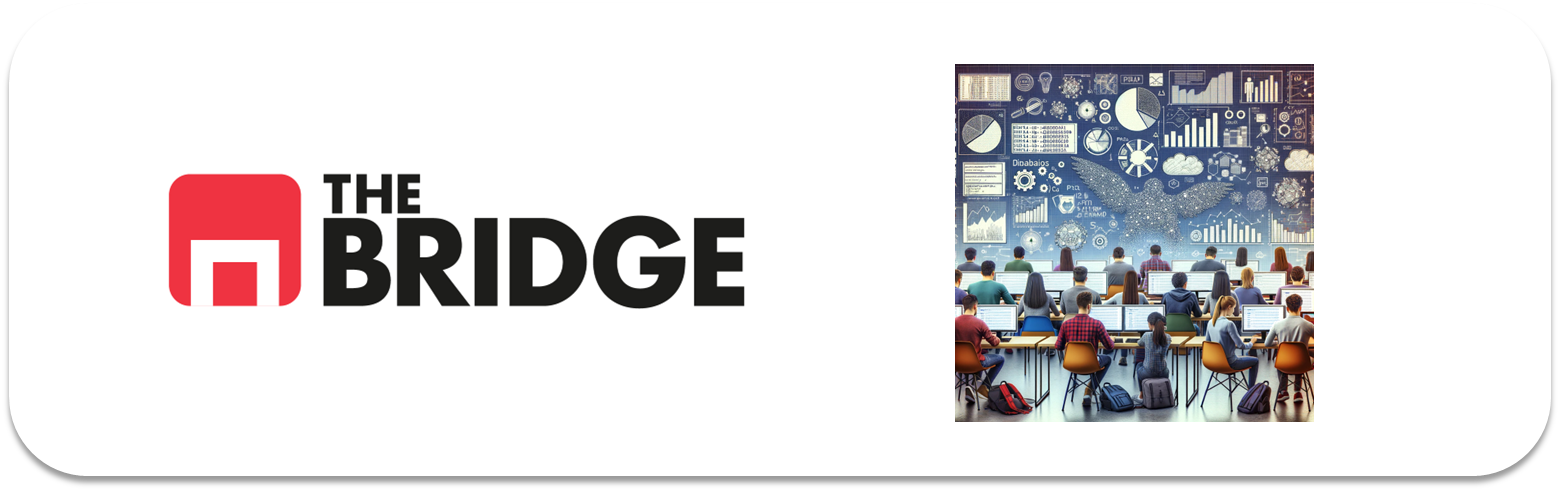

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descargar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es **predecir la mediana del precio de las casas en una zona del área metropolitana de Boston** dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [24]:
# los 4 jinetes de ML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# 1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas

df = pd.read_csv("./data/hard_to_find/obligatoria_hard.csv", sep = "|")
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [26]:
# Aqui podemos visualizar que CHAS (que es 0-1) y RAD, tienen pinta que son categoricas

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


- No hay nulos, significa que no hay faltantes NaN
- Pero ojo, esto es porque son FLOATS. Si nos encontramos con una columna OBJECT puede que noss encontremos un valor que esté escrito "Nulo", no lo va a interpretar como NaN (no es el caso pq todas son floats)

In [28]:
# 2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.

# Como el objetivo es: predecir la mediana del precio de las casas en una zona del área metropolitana de Boston
# la columna MEDV: Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares
# es la que mejor encaja con TARGET

target = "MEDV"

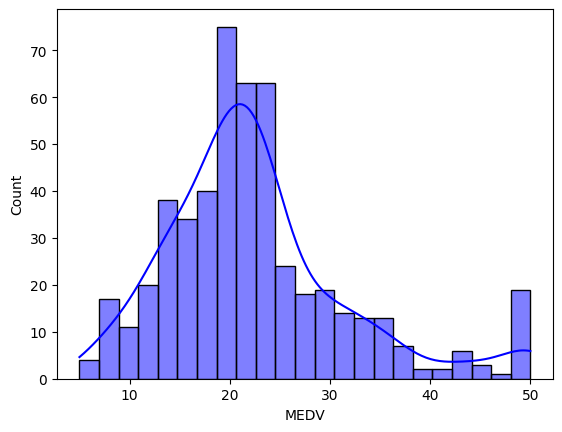

In [29]:
# analizamos la variable target

sns.histplot(df['MEDV'], color='Blue', kde = True)
plt.show()

Tiene una distribución en forma de campana de Gauss, una distribución normal, y por tanto eso es una buena señal para aplicar regresión lineal.
- Aunque tiene valores "capados", ahora mismo lo vamos a tratar
- Mas adelante podríamos tratarlo como outlier

In [30]:
# 3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
from sklearn.model_selection import train_test_split

# Divido el dataset en train (80%) y test (20%)
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

# train_set, el 80% de los datos    cuenta con todo (feature y target)
# test_set, el 20% de los datos     cuenta con todo (feature y target)

# Train_set va a ser con que trabajemos
# Test_set nos servirá para evaluar el modelo

In [31]:
# 4. Construye las parejas X,y de train y test

# target = "MEDV"

X_train = train_set.drop(target, axis=1)    # X_train, es el df de entrenamiento sin target
y_train = train_set[target]                 # y_train, es el df de entrenamiento solo del target

# Idem al TEST
X_test = test_set.drop(target, axis=1)
y_test = test_set[target]

In [32]:
print("\nDF completo, todos los valores y todas las colunas")
print(df.shape)          #tenemos 506 valores

print("\nCON la columna Target")
print(train_set.shape)   #80% de 506
print(test_set.shape)

print("\nSIN la columna Target")
print(X_train.shape)     #80% de 506
print(X_test.shape)

print("\nSOLO la columna Target")
print(y_train.shape)     #20% de 506
print(y_test.shape)


DF completo, todos los valores y todas las colunas
(506, 13)

CON la columna Target
(404, 13)
(102, 13)

SIN la columna Target
(404, 12)
(102, 12)

SOLO la columna Target
(404,)
(102,)


In [33]:
# 5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.

# Analisis BIVARIANTE de Target vs el resto
train_set.corr(numeric_only= True)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.198855,0.400198,-0.044589,0.396406,-0.200303,0.334090,-0.366487,0.615947,0.576894,0.288970,0.414142,-0.380091
ZN,-0.198855,1.000000,-0.533489,-0.043754,-0.526414,0.274661,-0.575078,0.681817,-0.313790,-0.294267,-0.389163,-0.396572,0.309504
INDUS,0.400198,-0.533489,1.000000,0.095158,0.770957,-0.398690,0.636569,-0.707566,0.588952,0.702353,0.348303,0.603644,-0.470546
CHAS,-0.044589,-0.043754,0.095158,1.000000,0.135476,0.111272,0.096016,-0.121671,0.028685,0.007746,-0.113003,-0.070652,0.190642
NOX,0.396406,-0.526414,0.770957,0.135476,1.000000,-0.299615,0.720417,-0.772330,0.589061,0.650247,0.161253,0.593862,-0.415768
RM,-0.200303,0.274661,-0.398690,0.111272,-0.299615,1.000000,-0.210863,0.198299,-0.199738,-0.281127,-0.342643,-0.612577,0.710680
AGE,0.334090,-0.575078,0.636569,0.096016,0.720417,-0.210863,1.000000,-0.756589,0.430321,0.471670,0.240841,0.571051,-0.340216
DIS,-0.366487,0.681817,-0.707566,-0.121671,-0.772330,0.198299,-0.756589,1.000000,-0.483329,-0.523577,-0.217588,-0.494921,0.235114
RAD,0.615947,-0.313790,0.588952,0.028685,0.589061,-0.199738,0.430321,-0.483329,1.000000,0.912527,0.472257,0.480301,-0.387467
TAX,0.576894,-0.294267,0.702353,0.007746,0.650247,-0.281127,0.471670,-0.523577,0.912527,1.000000,0.444836,0.530632,-0.459795


In [34]:
# me está incluyendo CHAD y RAD, que son categoricas verdaderamente (que no debería de calcularme la correlacion)

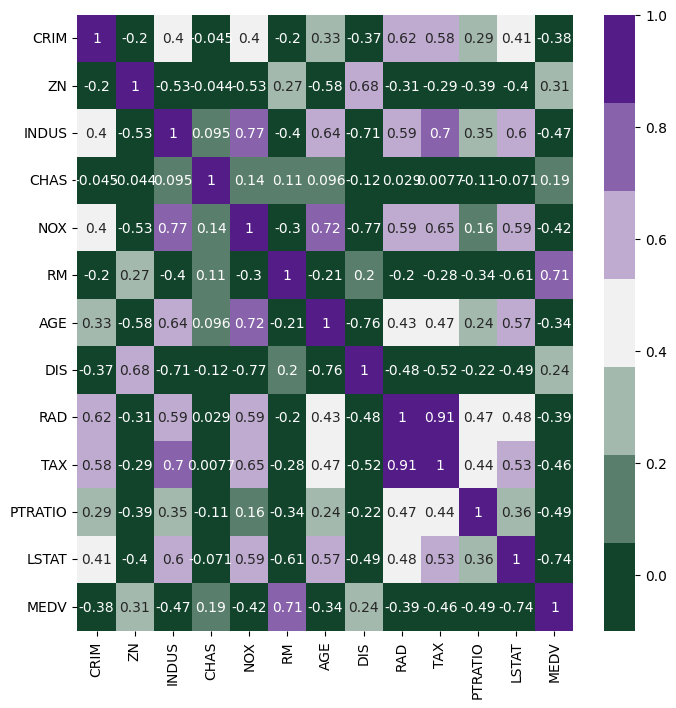

In [35]:
plt.figure(figsize=(8,8))
sns.heatmap(train_set.corr(),
           
           vmin = -0.1,
           vmax = 1,

           cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
           annot=True);

In [36]:
# me está incluyendo CHAD y RAD, que son categoricas verdaderamente (que no debería de calcularme la correlacion)

In [37]:
# correlacion de las variables numericas (en este caso todas) con la variable target

# np.abs (para valores absolutos)
serie_corr_abs = np.abs(train_set.corr(numeric_only=True)[target]).sort_values(ascending=False)
serie_corr_abs

MEDV       1.000000
LSTAT      0.736422
RM         0.710680
PTRATIO    0.491210
INDUS      0.470546
TAX        0.459795
NOX        0.415768
RAD        0.387467
CRIM       0.380091
AGE        0.340216
ZN         0.309504
DIS        0.235114
CHAS       0.190642
Name: MEDV, dtype: float64

In [38]:
# Correlacion features y target, sin añadir MEDV

np.abs(X_train.corrwith(y_train, numeric_only=True)).sort_values(ascending=False)

LSTAT      0.736422
RM         0.710680
PTRATIO    0.491210
INDUS      0.470546
TAX        0.459795
NOX        0.415768
RAD        0.387467
CRIM       0.380091
AGE        0.340216
ZN         0.309504
DIS        0.235114
CHAS       0.190642
dtype: float64

#### 1) Analizo la correlacion con el target (analisis bivariante)

¿cón cuales me quedo?
- Con el porcentaje que yo crea conveniente, en este caso un 31 % por ejemplo, es decir aquellas que tengan correlacion > 0.31

In [39]:
'''
# nos quedamos con lasfeatures num que superen el umbral
umbral_corr = 0.31  # umbral de correlacion alto que voy a aprobar
features_num = []

for columna in series_corr_abs.index:
    if series_corr_abs[columna] > umbral_corr:
        features_num.append(columna)

print(features_num)
'''

'\n# nos quedamos con lasfeatures num que superen el umbral\numbral_corr = 0.31  # umbral de correlacion alto que voy a aprobar\nfeatures_num = []\n\nfor columna in series_corr_abs.index:\n    if series_corr_abs[columna] > umbral_corr:\n        features_num.append(columna)\n\nprint(features_num)\n'

In [40]:
criterio = 0.31
features_num = serie_corr_abs[serie_corr_abs > criterio].index.to_list()
features_num

['MEDV', 'LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'RAD', 'CRIM', 'AGE']

In [41]:
# Recordamos que RAD y CHAS eran categoricas, así que la eliminamos (en este caso, solo RAD)
# Ademas de la target MEDV

features_num.remove(target)
features_num.remove("RAD")

features_num # FEATURE NUM a analizar

['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'AGE']

#### 2) COLINEALIDAD: Veo la correlación entre variables (que no sean target), para descartar alguna
- Me interesa las que sean altas entre ellas (son potencialmente descartables)
- Eliminaré aquella que sea mas baja con el target

In [42]:
train_set[features_num].head(2)

,LSTAT,RM,PTRATIO,INDUS,TAX,NOX,CRIM,AGE
477,24.91,5.304,20.2,18.10,666.0,0.614,15.02340,97.3
15,8.47,5.834,21.0,8.14,307.0,0.538,0.62739,56.5


<Axes: >

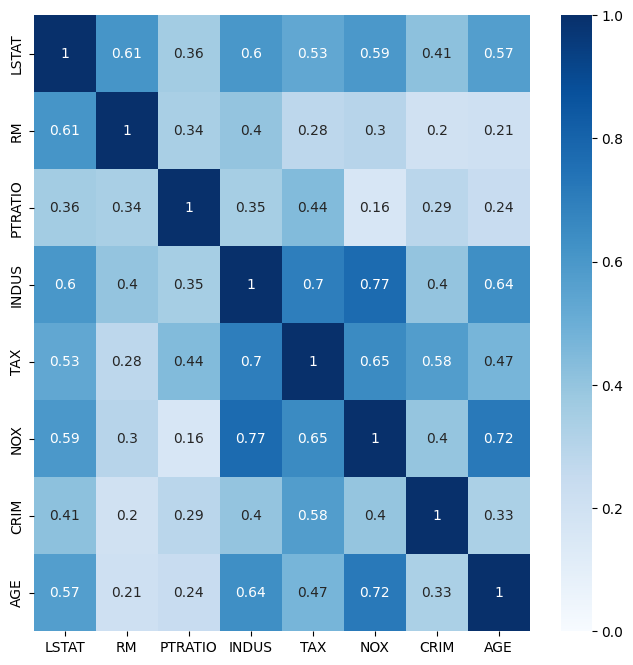

In [43]:
''' 
En un mapa de calor, 

si NO lo hago con valores absolutos, 
me interesa las paletas que el 0 sea de un color (mapas de color simetricos); 
y los limites el -1 y el 1 sean de otro para visualizarlo bien (pero quizas me meta mas colores)

SI lo hago con valores absolutos (mas fácil de visualizar),
puedo definir los limites entre 0-1, de forma que así visualice bien solo los cercanos a 1

'''

plt.figure(figsize = (8,8))
sns.heatmap(np.abs(train_set[features_num].corr()), 
            annot = True,

            # Defin
            vmin= 0,   # los limites
            vmax= 1,    # 

            cmap = "Blues")

¿qué criterio (>70% por ejemplo) vamos a utilizar para cargarnos columnas?
- Vamos a ir bajando de mas importante a menos importante

¿cuales son las mas importantes?
- Aquellas que tienen mayor correlacion con nuestra variable objetivo

In [44]:
# En todo el set
corr = train_set.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.198855,0.400198,-0.044589,0.396406,-0.200303,0.334090,-0.366487,0.615947,0.576894,0.288970,0.414142,-0.380091
ZN,-0.198855,1.000000,-0.533489,-0.043754,-0.526414,0.274661,-0.575078,0.681817,-0.313790,-0.294267,-0.389163,-0.396572,0.309504
INDUS,0.400198,-0.533489,1.000000,0.095158,0.770957,-0.398690,0.636569,-0.707566,0.588952,0.702353,0.348303,0.603644,-0.470546
CHAS,-0.044589,-0.043754,0.095158,1.000000,0.135476,0.111272,0.096016,-0.121671,0.028685,0.007746,-0.113003,-0.070652,0.190642
NOX,0.396406,-0.526414,0.770957,0.135476,1.000000,-0.299615,0.720417,-0.772330,0.589061,0.650247,0.161253,0.593862,-0.415768
RM,-0.200303,0.274661,-0.398690,0.111272,-0.299615,1.000000,-0.210863,0.198299,-0.199738,-0.281127,-0.342643,-0.612577,0.710680
AGE,0.334090,-0.575078,0.636569,0.096016,0.720417,-0.210863,1.000000,-0.756589,0.430321,0.471670,0.240841,0.571051,-0.340216
DIS,-0.366487,0.681817,-0.707566,-0.121671,-0.772330,0.198299,-0.756589,1.000000,-0.483329,-0.523577,-0.217588,-0.494921,0.235114
RAD,0.615947,-0.313790,0.588952,0.028685,0.589061,-0.199738,0.430321,-0.483329,1.000000,0.912527,0.472257,0.480301,-0.387467
TAX,0.576894,-0.294267,0.702353,0.007746,0.650247,-0.281127,0.471670,-0.523577,0.912527,1.000000,0.444836,0.530632,-0.459795


In [45]:
criterio_col = 0.7
excluidas = []
for col in features_num:
    print(f"Voy a comprobar la colinealidad con {col}")
    if col not in excluidas:
        for col_2,valor_corr in corr[col].items():
            print(f"Comprobando con {col_2}")
            if col != col_2 and col_2 in features_num:
                if np.abs(valor_corr) >= criterio_col:
                    print(f"Correlo al {valor_corr}, por eso excluyo a {col_2}")
                    excluidas.append(col_2)
                else:
                    print(f"Conmigo no tiene problema, dejo a {col_2} tranquila")
            elif col == col_2:
                print("soy yo misma, no me excluyo")
            else:
                print("No estaba ya en la lista original, no hago nada")
excluidas = list(set(excluidas))

Voy a comprobar la colinealidad con LSTAT
Comprobando con CRIM
Conmigo no tiene problema, dejo a CRIM tranquila
Comprobando con ZN
No estaba ya en la lista original, no hago nada
Comprobando con INDUS
Conmigo no tiene problema, dejo a INDUS tranquila
Comprobando con CHAS
No estaba ya en la lista original, no hago nada
Comprobando con NOX
Conmigo no tiene problema, dejo a NOX tranquila
Comprobando con RM
Conmigo no tiene problema, dejo a RM tranquila
Comprobando con AGE
Conmigo no tiene problema, dejo a AGE tranquila
Comprobando con DIS
No estaba ya en la lista original, no hago nada
Comprobando con RAD
No estaba ya en la lista original, no hago nada
Comprobando con TAX
Conmigo no tiene problema, dejo a TAX tranquila
Comprobando con PTRATIO
Conmigo no tiene problema, dejo a PTRATIO tranquila
Comprobando con LSTAT
soy yo misma, no me excluyo
Comprobando con MEDV
No estaba ya en la lista original, no hago nada
Voy a comprobar la colinealidad con RM
Comprobando con CRIM
Conmigo no tiene pr

In [46]:
'''

criterio_col = 0.7
excluidas = []

print(f"ANALISIS COLINEALIDAD de features_num: \n{features_num}")

for col in features_num:
    print(f"\nCOLINEALIDAD con {col}:")

    if col not in excluidas: # si no la he añadido a la lista de excluida, miro la COLINEALIDAD

        for col_2,valor_corr in corr[col].items():
            
            if col != col_2 and col_2 in features_num:

                if np.abs(valor_corr) >= criterio_col: 
                    print(f"- {col_2}   Correlación ALTA, de {np.abs(round(valor_corr,2))}")
                    print("    Correlaciones con TARGET")
                    print(f"    {col_2}-Target:{np.abs(round(serie_corr_abs[col_2],2))} vs {col}-target: {np.abs(round(serie_corr_abs[col],2))} --> excluida: {col_2}")                    
                    excluidas.append(col_2)
                else:
                    print(f"- {col_2}   Correlación BAJA, de {np.abs(round(valor_corr,2))}")

            
            elif col == col_2:
                print("soy yo misma, no me excluyo")

            else:
                print("No estaba ya en la lista original, no hago nada")
            
    else:
        print(f"- {col} ya se excluyó")    

excluidas = list(set(excluidas))

excluidas

'''

'\n\ncriterio_col = 0.7\nexcluidas = []\n\nprint(f"ANALISIS COLINEALIDAD de features_num: \n{features_num}")\n\nfor col in features_num:\n    print(f"\nCOLINEALIDAD con {col}:")\n\n    if col not in excluidas: # si no la he añadido a la lista de excluida, miro la COLINEALIDAD\n\n        for col_2,valor_corr in corr[col].items():\n            \n            if col != col_2 and col_2 in features_num:\n\n                if np.abs(valor_corr) >= criterio_col: \n                    print(f"- {col_2}   Correlación ALTA, de {np.abs(round(valor_corr,2))}")\n                    print("    Correlaciones con TARGET")\n                    print(f"    {col_2}-Target:{np.abs(round(serie_corr_abs[col_2],2))} vs {col}-target: {np.abs(round(serie_corr_abs[col],2))} --> excluida: {col_2}")                    \n                    excluidas.append(col_2)\n                else:\n                    print(f"- {col_2}   Correlación BAJA, de {np.abs(round(valor_corr,2))}")\n\n            \n            elif co

In [47]:
# Lista definitiva de features_num
for excluida in excluidas:
    features_num.remove(excluida)
features_num

['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'CRIM', 'AGE']

In [48]:
'''
umbral_corr = 0.70 # umbral de correlacion alto que voy a aprobar

serie_feat_num[serie_feat_num.abs() > umbral_corr]
'''

'\numbral_corr = 0.70 # umbral de correlacion alto que voy a aprobar\n\nserie_feat_num[serie_feat_num.abs() > umbral_corr]\n'

In [49]:
'''
# Quiero visualizar solo la correlacion de las variables numericas que superen el umbral

# con stack() apillo las matrices
filtered_features = serie_feat_num[serie_feat_num.abs() > umbral_corr].stack().reset_index()

# nombre de las columnas
filtered_features.columns = ['Feature 1', 'Feature 2', 'Correlacion']

# me quedo solo con las correlaciones que no son de la misma variable
filtered_features = filtered_features[filtered_features['Feature 1'] != filtered_features['Feature 2']] 
# Eliminar duplicados
filtered_features = filtered_features.drop_duplicates(subset=['Correlacion'])

# Lista de las filtered_features
#filtered_features_list = filtered_features.values.tolist()
#print(filtered_features_list)

filtered_features
'''

"\n# Quiero visualizar solo la correlacion de las variables numericas que superen el umbral\n\n# con stack() apillo las matrices\nfiltered_features = serie_feat_num[serie_feat_num.abs() > umbral_corr].stack().reset_index()\n\n# nombre de las columnas\nfiltered_features.columns = ['Feature 1', 'Feature 2', 'Correlacion']\n\n# me quedo solo con las correlaciones que no son de la misma variable\nfiltered_features = filtered_features[filtered_features['Feature 1'] != filtered_features['Feature 2']] \n# Eliminar duplicados\nfiltered_features = filtered_features.drop_duplicates(subset=['Correlacion'])\n\n# Lista de las filtered_features\n#filtered_features_list = filtered_features.values.tolist()\n#print(filtered_features_list)\n\nfiltered_features\n"

In [50]:
'''
# Lista de Feature unicos
unique_features_1 = filtered_features["Feature 1"].unique().tolist()
unique_features_2 = filtered_features["Feature 2"].unique().tolist()
unique_features = list(set(unique_features_1 + unique_features_2))
unique_features
'''

'\n# Lista de Feature unicos\nunique_features_1 = filtered_features["Feature 1"].unique().tolist()\nunique_features_2 = filtered_features["Feature 2"].unique().tolist()\nunique_features = list(set(unique_features_1 + unique_features_2))\nunique_features\n'

In [51]:
# La correlacion de las anteriores con la target
# correlaciones_target = np.abs(series_corr_abs[unique_features]).sort_values(ascending=False)
# correlaciones_target

# Entre INDUS y TAX, descarto TAX por Correlacion de INDUS-TARGET > TAX-TARGET
# Entre INDUS y NOX, descarto NOX por Correlacion de INDUS-TARGET > NOX-TARGET
# como NOX ya la descarté, me daría igual su relacion con AGE (AGE no la descarto)

In [52]:
'''
# DataFrame con las correlaciones de las unique_features
df_correlaciones = correlaciones_target.reset_index()
df_correlaciones.columns = ['Feature', 'Correlacion Target']
df_correlaciones = df_correlaciones.sort_values(by='Correlacion Target', ascending=False)
df_correlaciones
'''

"\n# DataFrame con las correlaciones de las unique_features\ndf_correlaciones = correlaciones_target.reset_index()\ndf_correlaciones.columns = ['Feature', 'Correlacion Target']\ndf_correlaciones = df_correlaciones.sort_values(by='Correlacion Target', ascending=False)\ndf_correlaciones\n"

#### Feature categoricas

In [53]:
features_cat = ["CHAS","RAD"]

- No las vamos a convertir a numericas
- Vamos a ver la relacion con nuestra variable objetivo

Visulamente vamos a ver las distribuciones variable objetivo con las categoricas

##### - CHAS

In [54]:
train_set.CHAS.value_counts(normalize = True)

CHAS
0.0    0.928218
1.0    0.071782
Name: proportion, dtype: float64

<Axes: xlabel='MEDV', ylabel='Count'>

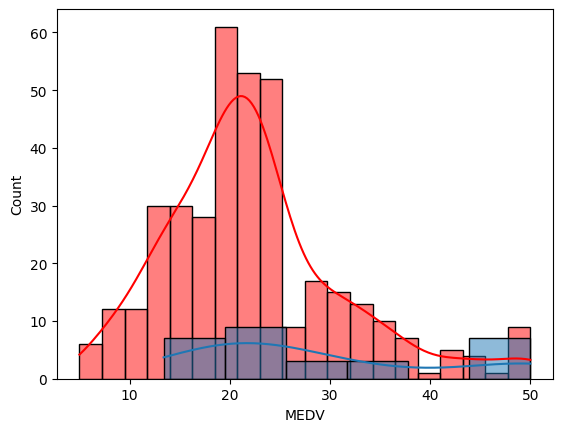

In [55]:
# DISTRIBUCIÓN DE VALORES PARA CHAS
sns.histplot(x= target, 
             data = train_set[train_set.CHAS == 0],  #CHAS = 0
             kde = True, 
             color = "red")  

sns.histplot(x= target, 
             data = train_set[train_set.CHAS == 1],  #CHAS = 1
             kde = True)                 

# Lo ideal es que no haya superposición

In [56]:
# si nos fijamos en CHAS = 1, el valor minimo empieza entorno al 13
# esto nos indca que hay una zona de valor qe está representado en uno CHAS=0 pero no en el otro CHAS=1
# ENTONCES pertencer a una categoria u otra puede alterar

In [57]:
# si hubiese superposición, (tienen mismo min y max), no aportarían demasiado. No influirian a nuestra variable objetivo

##### - RAD

In [58]:
train_set.RAD.value_counts(normalize = True)

# Si el 25% de valores estan en la categoria 24, y el 75% restaste en las otras
# podriamos estudiar como influye si esta categoria es igual a 24 o diferente a 24

RAD
24.0    0.250000
5.0     0.232673
4.0     0.198020
3.0     0.079208
6.0     0.056931
8.0     0.051980
2.0     0.051980
1.0     0.042079
7.0     0.037129
Name: proportion, dtype: float64

<Axes: xlabel='MEDV', ylabel='Count'>

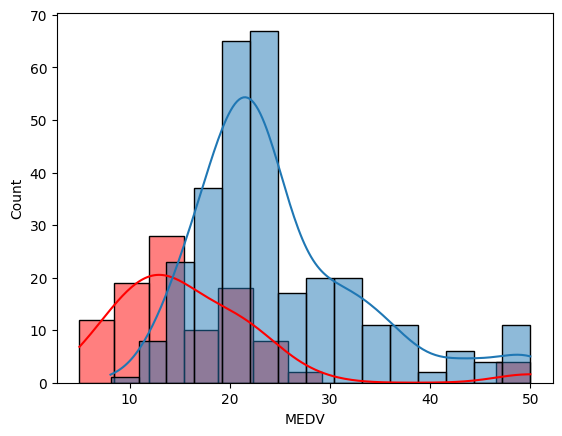

In [59]:
# ser 24 o distinto de 24
sns.histplot(x= target, data = train_set[train_set.RAD == 24], kde = True, color = "red")
sns.histplot(x= target, data = train_set[train_set.RAD != 24], kde = True)

In [60]:
# Estas desplazadas, por tanto pueden ser importantes para nuestro modelo
# no hay solape
# además los minimos no coinciden

In [61]:
#En resumen, me quedo con las dos feature categoricas

In [62]:
print("Mi feature seleccion, que va alimentar a nuestro modelo")
print("Feature num", features_num)
print("Feature cat", features_cat)

Mi feature seleccion, que va alimentar a nuestro modelo
Feature num ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'CRIM', 'AGE']
Feature cat ['CHAS', 'RAD']


In [63]:
# 6. Trata las variables para que funcionen lo mejor posible en el modelo.

#### PROCESAMOS LAS FEATURES NUMERICAS
1) TRANSFORMAR (logaritmicamente por ejemplo u otra transformacion)

2) ESCALAR

In [64]:
# primero TRANSFORMAR (LOGARITMO SI/NO)
# segundo ESCALAR (NORMALIZAR [MIN/MAX] / ESTANDARIZAR)

##### TRANSFORMACIÓN
- A criterio propio sobre las variables que yo vea
- El objetivo es que a nuestro modelo le sientan mejor las distribuciones normales (gaussianas)
- Por ello intentaremos acercanos a esa distribución

In [65]:
# Distribucion, NUMERICAMENTE 
train_set[features_num]

,LSTAT,RM,PTRATIO,INDUS,CRIM,AGE
477,24.91,5.304,20.2,18.10,15.02340,97.3
15,8.47,5.834,21.0,8.14,0.62739,56.5
332,7.83,6.031,16.9,6.06,0.03466,23.3
423,23.29,6.103,20.2,18.10,7.05042,85.1
19,11.28,5.727,21.0,8.14,0.72580,69.5
...,...,...,...,...,...,...
106,18.66,5.836,20.9,8.56,0.17120,91.9
270,13.00,5.856,18.6,6.96,0.29916,42.1
348,5.99,6.635,17.0,2.01,0.01501,29.7
435,23.27,6.629,20.2,18.10,11.16040,94.6


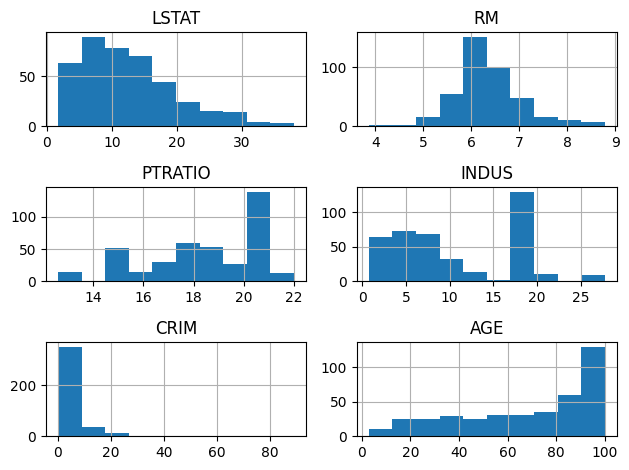

In [66]:
# Distribución VISUAL
train_set[features_num].hist()
plt.tight_layout()

In [67]:
# ¿A SIMPLE VISTA? a cual le beneficiará transformarla aplicarle logaritmo
# CRIM principalmente, parece que se va a beneficiar

TRAIN_SET
- Aplicamos transformaciones a train_set

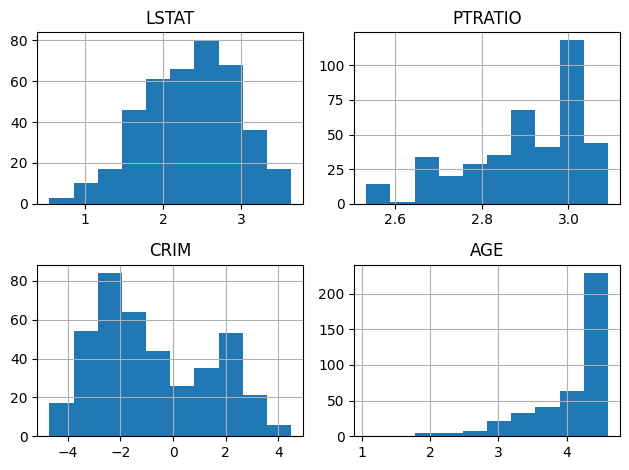

In [68]:
# aplico logaritmo al set train
features_transform = ["LSTAT","PTRATIO","CRIM","AGE"]
for feature in features_transform:
    X_train[feature] = X_train[feature].apply(np.log)

X_train[features_transform].hist()
plt.tight_layout();


In [69]:
# LSTAT, ya está bastante normalizada

# CRIM, ha mejorado bastante

# PTRATIO, no se ha visto tremendemante beneficiada

# AGE,  el problema está invertido, pq los datos están muy pegados a los valores superiores
        # por lo que en este casi quizas se beneficiaria de una transformacion exponecial (exponente en vez logaritmo)


# ahora mismo, lo dejamos asi

TEST_SET
- Aplicamos transformaciones a test_set

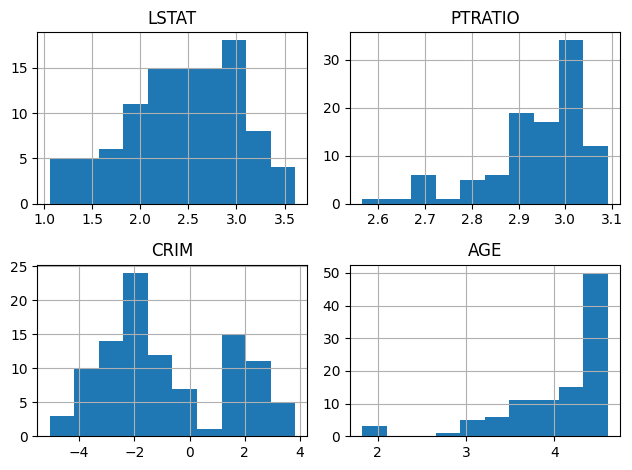

In [70]:
# aplico logaritmo al test_set
features_transform = ["LSTAT","PTRATIO","CRIM","AGE"]
for feature in features_transform:
    test_set[feature] = test_set[feature].apply(np.log)

test_set[features_transform].hist()
plt.tight_layout();

#### ESCALADO

- Hay que hacerselo a todas

In [71]:
# 6. Trata las variables para que funcionen lo mejor posible en el modelo.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()               # instanciamos

# (1)  FIT: Entrenamos, solo las feature_num (todos los parametros se guardan dentro de scaler)
scaler.fit(train_set[features_num])    

# el metodo fit_transform, debe de ir acompañado de una variable donde guardar los resultados

# OJO!! nunca apliquemos fit_transform al test_set
# POR ESO, una forma de evitarlo es aplicar fit y luego ya aplicarle el transform a cada uno

StandardScaler()

#### NOTA
El metodo **fit_transform** debe de ir acompañado de una variable donde guardar los resultados

**¡¡OJO!!** nunca apliquemos fit_transform al test_set
Para evitar que nos equivoquemos,
1. Aplicar **fit** (al train)
2. Luego, aplicarle el **transform** a cada uno (train y test)

In [72]:
# (2) TRANSFORM: Transformamos

train_set[features_num] =scaler.transform(train_set[features_num])
test_set[features_num] = scaler.transform(test_set[features_num])

# la transformación en el test_set es en base a lo entrenado en el train_set (1)

In [73]:
# comprobamos train_set
train_set[features_num].describe()

# todas las STD tienen una desviación de 1 

,LSTAT,RM,PTRATIO,INDUS,CRIM,AGE
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,-1.791746e-16,-2.616169e-16,8.519038e-16,-4.177077e-17,-2.638154e-17,-4.858600e-16
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-1.510559e+00,-3.461733e+00,-2.568944e+00,-1.487791e+00,-4.061414e-01,-2.348206e+00
25%,-8.005057e-01,-6.003488e-01,-6.821011e-01,-8.502733e-01,-3.979761e-01,-8.228264e-01
50%,-2.157763e-01,-1.494427e-01,1.714705e-01,-3.521669e-01,-3.776748e-01,3.270201e-01
75%,5.513070e-01,4.528240e-01,8.453428e-01,1.033237e+00,-4.582119e-02,8.974727e-01
max,3.592534e+00,3.477564e+00,1.653990e+00,2.433163e+00,9.630689e+00,1.124581e+00


In [74]:
# comprobamos test_set
test_set[features_num].describe()

# ya no son 1  exactos

,LSTAT,RM,PTRATIO,INDUS,CRIM,AGE
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,-1.410623,-0.218831,-6.908901,0.109307,-0.497183,-2.305667
std,0.083457,0.936848,0.045672,0.976256,0.251556,0.021998
min,-1.605216,-3.887942,-7.077172,-1.528453,-0.978463,-2.386670
25%,-1.466965,-0.628927,-6.921103,-0.709046,-0.682167,-2.316750
50%,-1.400381,-0.205189,-6.901983,-0.057369,-0.583559,-2.297653
75%,-1.347027,0.230546,-6.879174,1.033237,-0.236928,-2.288970
max,-1.245776,2.424744,-6.840826,2.433163,0.024140,-2.287221


In [75]:
features_all = features_num + features_cat

In [76]:
X_train = train_set[features_all]
y_train = train_set[target]

In [77]:
# 7. Construye un modelo de regresión lineal.

from sklearn.linear_model import LinearRegression

# Creamos un objeto
lin_reg = LinearRegression() # instancio

lin_reg.fit(X_train, y_train) #entreno

# Ent

LinearRegression()

In [78]:
# 8. Analiza si lo crees conveniente los pesos y la importancia de las features.

# Intercepto
lin_reg.coef_

array([-4.03347327,  3.34598535, -1.80938651, -0.17969063, -0.90399039,
        0.49086553,  3.24213281,  0.03218065])

In [79]:
# Pesos, coeficientes
lin_reg.feature_names_in_

array(['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'CRIM', 'AGE', 'CHAS', 'RAD'],
      dtype=object)

In [80]:
print("y_est = ", end = "")
for coef,feat in zip(lin_reg.coef_, lin_reg.feature_names_in_):
    print(f"{coef}*{feat}", end = " + ")

y_est = -4.033473268832688*LSTAT + 3.3459853532124937*RM + -1.8093865092308308*PTRATIO + -0.1796906260214814*INDUS + -0.903990394129119*CRIM + 0.49086553285784923*AGE + 3.2421328146746973*CHAS + 0.032180646886862174*RAD + 

#### EVALUACION DEL MODELO

Train_error

In [81]:
# vamos a ver como es de bueno contra si mismo

from sklearn.metrics import median_absolute_error, root_mean_squared_error, mean_absolute_percentage_error

pred_train = lin_reg.predict(X_train)   # Predice con el conjunto de feature de entrenamiento

# Metricas
print("MAE:", median_absolute_error(y_train, pred_train))
print("RMSE:", root_mean_squared_error(y_train, pred_train))
print("R^2:", lin_reg.score(X_train, y_train))

# baseline
# parece que no estamos muy sobreajustado (no tenemos tampoco ningun 0 absoluto)

MAE: 2.6660840426099437
RMSE: 5.080973700696728
R^2: 0.702828568835497


Test_error

In [82]:
X_test = test_set[features_all]
y_test = test_set[target]

In [83]:
from sklearn.metrics import median_absolute_error, root_mean_squared_error, mean_absolute_percentage_error


pred_test = lin_reg.predict(X_test)

print("MAE:", median_absolute_error(y_test, pred_test))
print("RMSE:", root_mean_squared_error(y_test, pred_test))
print("R^2:", lin_reg.score(X_test, y_test))

MAE: 18.4949032730058
RMSE: 19.24091052834361
R^2: -4.0483231875595695


In [84]:
# No es habitual que las metricas de TEST sean mejores que las de entrenamiento
# pero los modelos de regresion lineal generalizan muy bien, sobre valores no conocidos

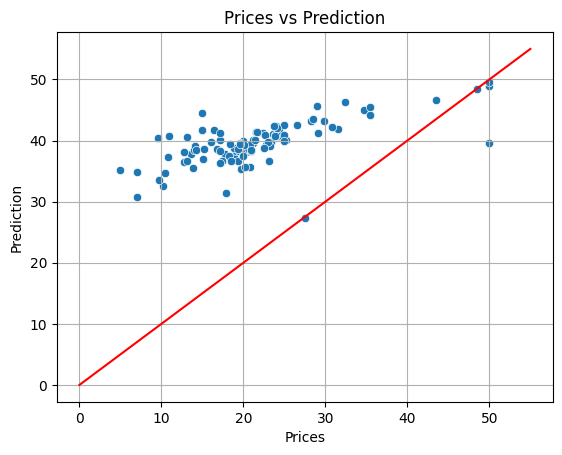

In [85]:
sns.scatterplot(x=y_test, y= pred_test)
plt.plot([0,55],[0,55],'red')
plt.grid()
plt.xlabel('Prices')
plt.ylabel('Prediction')
plt.title('Prices vs Prediction')
plt.show() 

In [86]:
# 9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.

from sklearn.linear_model import Ridge, Lasso, ElasticNet

ridge_reg = Ridge(alpha = 1000) # L2
lasso_reg = Lasso(alpha = 1000) # L1
elastic_reg = ElasticNet(alpha = 10, l1_ratio = 0.5) # l1_ratio*L1 + (1-l1_ratio)*L2

for nombre, model in zip(["Ridge","Lasso","ElasticNet"],[ridge_reg, lasso_reg, elastic_reg]):
    model.fit(X_train,y_train)
    print("\nModelo :", nombre)
    
    print("\nTRAIN:")
    pred_train  = model.predict(X_train)
    print("- MAE:", median_absolute_error(y_train, pred_train))
    print("- RMSE:", root_mean_squared_error(y_train, pred_train))
    print("- R^2:", lin_reg.score(X_train, y_train))
    
    print("TEST:")
    pred_test = model.predict(X_test)
    print("- MAE:", median_absolute_error(y_test, pred_test))
    print("- RMSE:", root_mean_squared_error(y_test, pred_test))
    print("- R^2:", lin_reg.score(X_test, y_test))



Modelo : Ridge

TRAIN:
- MAE: 3.4789017275527616
- RMSE: 6.633275484121148
- R^2: 0.702828568835497
TEST:
- MAE: 9.964604460402134
- RMSE: 10.851502311179015
- R^2: -4.0483231875595695

Modelo : Lasso

TRAIN:
- MAE: 5.0465346534653435
- RMSE: 9.320590315691252
- R^2: 0.702828568835497
TEST:
- MAE: 4.346534653465344
- RMSE: 8.662876564628665
- R^2: -4.0483231875595695

Modelo : ElasticNet

TRAIN:
- MAE: 4.812338884742504
- RMSE: 8.468708529182774
- R^2: 0.702828568835497
TEST:
- MAE: 4.340675787803175
- RMSE: 7.987743015870257
- R^2: -4.0483231875595695


In [87]:
# Como no he cambiado los hiperparametros, y no he ajustado cada uno se me va

In [88]:
# 10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?

